# Определение перспективного тарифа для телеком компании

Компания «Мегалайн» — федеральный оператор сотовой связи. Клиентам предлагают два тарифных плана: «Смарт» и «Ультра». Чтобы скорректировать рекламный бюджет, коммерческий департамент хочет понять, какой тариф приносит больше денег.

Предстоит сделать предварительный анализ тарифов на небольшой выборке клиентов. В распоряжении данные 500 пользователей «Мегалайна»: кто они, откуда, каким тарифом пользуются, сколько звонков и сообщений каждый отправил за 2018 год. Нужно проанализировать поведение клиентов и сделать вывод — какой тариф лучше.

## Описание тарифов

**Тариф «Смарт»**

- Ежемесячная плата: 550 рублей
- Включено 500 минут разговора, 50 сообщений и 15 Гб интернет-трафика
- Стоимость услуг сверх тарифного пакета:
- минута разговора: 3 рубля
- сообщение: 3 рубля
- 1 Гб интернет-трафика: 200 рублей

**Тариф «Ультра»**

-  плата: 1950 рублей
- Включено 3000 минут разговора, 1000 сообщений и 30 Гб интернет-трафика
- Стоимость услуг сверх тарифного пакета:
- минута разговора: 1 рубль
- сообщение: 1 рубль
- 1 Гб интернет-трафика: 150 рублей

## ШАГ 1

## Открываем файлы с данными и изучаем общую информацию / предобрабатываем данные

In [2]:
import pandas as pd
calls = pd.read_csv('/datasets/calls.csv')
internet = pd.read_csv('/datasets/internet.csv')
messages = pd.read_csv('/datasets/messages.csv')
tariffs = pd.read_csv('/datasets/tariffs.csv')
users = pd.read_csv('/datasets/users.csv')


Просмотрим каждый датасет.

Начнем со звонков:

In [3]:
calls.sample(10)

,id,call_date,duration,user_id
126066,1324_199,2018-11-13,16.57,1324
185973,1459_110,2018-12-03,4.57,1459
140263,1358_25,2018-09-21,4.27,1358
2839,1007_42,2018-11-21,13.27,1007
193781,1476_78,2018-07-31,8.03,1476
146478,1372_656,2018-12-12,0.00,1372
14649,1039_124,2018-09-01,5.05,1039
133966,1342_104,2018-11-29,6.38,1342
183992,1456_464,2018-10-04,13.97,1456
144031,1363_943,2018-11-23,1.44,1363


In [4]:
calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
id           202607 non-null object
call_date    202607 non-null object
duration     202607 non-null float64
user_id      202607 non-null int64
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


In [5]:
calls.describe()

,duration,user_id
count,202607.000000,202607.000000
mean,6.755887,1253.940619
std,5.843365,144.722751
min,0.000000,1000.000000
25%,1.300000,1126.000000
50%,6.000000,1260.000000
75%,10.700000,1379.000000
max,38.000000,1499.000000


Исходя из наглядного анализа, нам необходимо:

- привести столб с датой к правильному формату
- изучить нулевые значения в продолжительности звонков
- округлим значения продолжительности звонков в большую сторону до целого( по условиям оператора)

In [6]:
#приведем дату к верному формату
calls['call_date'] = pd.to_datetime(calls['call_date'], format="%Y-%m-%dT%H:%M:%S")

In [7]:
calls[calls['duration'] == 0]['duration'].count()

39613

В столбе "продолжительность зконков" 39,6т имеют нулевые значения. По условиям оператора, тарификация с первой секунды округляется до минуты в большую сторону. Округлим их до 1 минуты.

In [8]:
calls['duration'] = calls['duration'].replace(0, 1)

In [9]:
#округлим все звонки до следующего целого числа
import numpy as np
calls['duration'] = calls['duration'].apply(np.ceil).astype('int')

In [10]:
calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
id           202607 non-null object
call_date    202607 non-null datetime64[ns]
duration     202607 non-null int64
user_id      202607 non-null int64
dtypes: datetime64[ns](1), int64(2), object(1)
memory usage: 6.2+ MB


In [11]:
#переходим к столбу интернета
internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
Unnamed: 0      149396 non-null int64
id              149396 non-null object
mb_used         149396 non-null float64
session_date    149396 non-null object
user_id         149396 non-null int64
dtypes: float64(1), int64(2), object(2)
memory usage: 5.7+ MB


In [12]:
internet.sample(5)

,Unnamed: 0,id,mb_used,session_date,user_id
10091,10091,1034_81,651.40,2018-10-10,1034
107619,107619,1365_143,203.41,2018-11-23,1365
94098,94098,1318_112,380.04,2018-09-26,1318
21888,21888,1072_611,504.10,2018-08-17,1072
41330,41330,1145_66,327.65,2018-06-13,1145


In [13]:
internet.describe()

,Unnamed: 0,mb_used,user_id
count,149396.000000,149396.000000,149396.000000
mean,74697.500000,370.192426,1252.099842
std,43127.054745,278.300951,144.050823
min,0.000000,0.000000,1000.000000
25%,37348.750000,138.187500,1130.000000
50%,74697.500000,348.015000,1251.000000
75%,112046.250000,559.552500,1380.000000
max,149395.000000,1724.830000,1499.000000


Аналогично 0 мб поднимем до одного и округлим все дробные значения. Изменим формат даты

In [14]:
internet['session_date'] = pd.to_datetime(internet['session_date'], format="%Y-%m-%dT%H:%M:%S")

In [15]:
internet['mb_used'] = internet['mb_used'].replace(0, 1)

In [16]:
internet['mb_used'] = internet['mb_used'].apply(np.ceil).astype('int')

In [17]:
internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
Unnamed: 0      149396 non-null int64
id              149396 non-null object
mb_used         149396 non-null int64
session_date    149396 non-null datetime64[ns]
user_id         149396 non-null int64
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 5.7+ MB


In [18]:
#посмотрим столб с сообщениями
messages.sample(5)

,id,message_date,user_id
47515,1209_449,2018-08-16,1209
89653,1374_101,2018-11-14,1374
20007,1089_10,2018-08-23,1089
68164,1288_159,2018-12-28,1288
91254,1378_84,2018-06-04,1378


In [19]:
messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
id              123036 non-null object
message_date    123036 non-null object
user_id         123036 non-null int64
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


In [20]:
messages.describe()

,user_id
count,123036.000000
mean,1256.989410
std,143.523967
min,1000.000000
25%,1134.000000
50%,1271.000000
75%,1381.000000
max,1499.000000


In [21]:
#здесь дата, приведем ее к формату и номер id - приведем его к числовому формату
messages['message_date'] = pd.to_datetime(messages['message_date'], format="%Y-%m-%dT%H:%M:%S")

In [22]:
messages['id'] = messages['id'].astype('int')

In [23]:
messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
id              123036 non-null int64
message_date    123036 non-null datetime64[ns]
user_id         123036 non-null int64
dtypes: datetime64[ns](1), int64(2)
memory usage: 2.8 MB


In [24]:
#переходим к столбу пользователей
users.sample(5)

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
151,1151,39,NaN,Пенза,Лариса,Молчанова,2018-09-15,ultra
234,1234,54,NaN,Магнитогорск,Роксана,Алексеева,2018-12-19,ultra
178,1178,56,NaN,Москва,Наталья,Жарова,2018-05-15,smart
100,1100,58,NaN,Санкт-Петербург,Руслан,Красильников,2018-07-02,smart
150,1150,58,NaN,Сургут,Майя,Муравьева,2018-08-05,ultra


In [25]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
user_id       500 non-null int64
age           500 non-null int64
churn_date    38 non-null object
city          500 non-null object
first_name    500 non-null object
last_name     500 non-null object
reg_date      500 non-null object
tariff        500 non-null object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


In [26]:
users.describe()

,user_id,age
count,500.000000,500.00000
mean,1249.500000,46.58800
std,144.481833,16.66763
min,1000.000000,18.00000
25%,1124.750000,32.00000
50%,1249.500000,46.00000
75%,1374.250000,62.00000
max,1499.000000,75.00000


In [27]:
#приведем дату к формату
users['reg_date'] = pd.to_datetime(users['reg_date'], format="%Y-%m-%dT%H:%M:%S")
users['churn_date'] = pd.to_datetime(users['churn_date'], format="%Y-%m-%dT%H:%M:%S")

Есть пропуски в дате окончания тарифа, но пояснение , что если значение пропущено, значит тариф еще действовал. Поэтому ничем их заполнять не будем

In [28]:
tariffs.head()

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


In [29]:
tariffs.describe()

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute
count,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
mean,525.000000,23040.000000,1750.000000,1250.000000,175.000000,2.000000,2.000000
std,671.751442,10861.160159,1767.766953,989.949494,35.355339,1.414214,1.414214
min,50.000000,15360.000000,500.000000,550.000000,150.000000,1.000000,1.000000
25%,287.500000,19200.000000,1125.000000,900.000000,162.500000,1.500000,1.500000
50%,525.000000,23040.000000,1750.000000,1250.000000,175.000000,2.000000,2.000000
75%,762.500000,26880.000000,2375.000000,1600.000000,187.500000,2.500000,2.500000
max,1000.000000,30720.000000,3000.000000,1950.000000,200.000000,3.000000,3.000000


In [30]:
tariffs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
messages_included        2 non-null int64
mb_per_month_included    2 non-null int64
minutes_included         2 non-null int64
rub_monthly_fee          2 non-null int64
rub_per_gb               2 non-null int64
rub_per_message          2 non-null int64
rub_per_minute           2 non-null int64
tariff_name              2 non-null object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes


Здесь вся информация о тарифах, поэтому тут нечего обрабатывать. Просто ознакомимся

## ШАГ 2
## Подготовка данных

**Посчитаем для каждого пользователя:**
- количество сделанных звонков и израсходованных минут разговора по месяцам;
- количество отправленных сообщений по месяцам;
- объем израсходованного интернет-трафика по месяцам;
- помесячную выручку с каждого пользователя (вычтите бесплатный лимит из суммарного количества звонков, сообщений и интернет-трафика; остаток умножьте на значение из тарифного плана; прибавьте абонентскую плату, соответствующую тарифному плану).

In [31]:
#добавим столбец с названием месяца к таблице звонков
calls['month'] = calls['call_date'].dt.month_name()

In [32]:
#посчитаем количество звонков и израсходованных минут
user_calls = calls.groupby(['user_id', 'month'])\
                  .agg({'duration':'sum', 'id':'count'}).reset_index()

In [33]:
user_calls.head()

,user_id,month,duration,id
0,1000,August,418,52
1,1000,December,341,46
2,1000,July,346,47
3,1000,June,187,43
4,1000,May,164,22


In [34]:
#добавим столб с месяцами в таблицу сообщений
messages['month'] =messages['message_date'].dt.month_name()

In [35]:
#посчитаем количество сообщений каждого абонента по месяцам
users_message = messages.groupby(['user_id', 'month']).agg({'id':'count'}).reset_index()

In [36]:
users_message.head()

,user_id,month,id
0,1000,August,81
1,1000,December,70
2,1000,July,75
3,1000,June,60
4,1000,May,22


In [37]:
#добавим столб с месяцами в таблицу трафика 
internet['month'] =internet['session_date'].dt.month_name()

In [38]:
#посчитаем количество израсходованного траффика по каждому пользователю
users_internet = internet.groupby(['user_id', 'month']).agg({'mb_used':'sum'}).reset_index()

In [39]:
users_internet.head()

,user_id,month,mb_used
0,1000,August,14072
1,1000,December,9829
2,1000,July,14017
3,1000,June,23262
4,1000,May,2257


Чтобы посчитать месячную выручку, склеим все полученные данные в одну большую таблицу, воспользовавшись методом merge

In [40]:
data = user_calls.merge(users_message, on = ['user_id', 'month'], how = 'outer')

In [41]:
data.head()

,user_id,month,duration,id_x,id_y
0,1000,August,418.0,52.0,81.0
1,1000,December,341.0,46.0,70.0
2,1000,July,346.0,47.0,75.0
3,1000,June,187.0,43.0,60.0
4,1000,May,164.0,22.0,22.0


In [42]:
data = data.merge(users_internet, on = ['user_id', 'month'], how = 'outer')

In [43]:
data = data.merge(users, on = 'user_id', how = 'left')

In [44]:
data.head()

,user_id,month,duration,id_x,id_y,mb_used,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,August,418.0,52.0,81.0,14072.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1000,December,341.0,46.0,70.0,9829.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
2,1000,July,346.0,47.0,75.0,14017.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
3,1000,June,187.0,43.0,60.0,23262.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
4,1000,May,164.0,22.0,22.0,2257.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra


In [45]:
tariffs.head()

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


У нас есть столб с тарифом в каждой таблице, но для склейки они имеют разные имена. Переименуем

In [46]:
tariffs = tariffs.rename(columns={'tariff_name':'tariff'})

In [47]:
data = data.merge(tariffs, on = 'tariff', how = 'left')

In [48]:
data = data.rename(columns={'id_x':'calls_month', 'id_y':'message_month'})

In [49]:
data.sample(5)

,user_id,month,duration,calls_month,message_month,mb_used,age,churn_date,city,first_name,last_name,reg_date,tariff,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute
2056,1327,September,472.0,61.0,45.0,15368.0,45,NaT,Новороссийск,Клавдия,Севастьянова,2018-04-09,smart,50,15360,500,550,200,3,3
1015,1163,December,240.0,37.0,20.0,9392.0,21,2018-12-16,Москва,Лев,Вишневский,2018-11-03,smart,50,15360,500,550,200,3,3
1622,1261,October,9.0,3.0,1.0,1848.0,46,NaT,Казань,Мадина,Пантелеева,2018-10-30,smart,50,15360,500,550,200,3,3
1421,1225,September,696.0,100.0,NaN,23070.0,71,NaT,Оренбург,Даниэла,Горбачева,2018-04-26,ultra,1000,30720,3000,1950,150,1,1
973,1155,October,328.0,49.0,59.0,11998.0,71,NaT,Ставрополь,Александр,Чернов,2018-01-02,smart,50,15360,500,550,200,3,3


In [50]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3214 entries, 0 to 3213
Data columns (total 20 columns):
user_id                  3214 non-null int64
month                    3214 non-null object
duration                 3174 non-null float64
calls_month              3174 non-null float64
message_month            2717 non-null float64
mb_used                  3203 non-null float64
age                      3214 non-null int64
churn_date               187 non-null datetime64[ns]
city                     3214 non-null object
first_name               3214 non-null object
last_name                3214 non-null object
reg_date                 3214 non-null datetime64[ns]
tariff                   3214 non-null object
messages_included        3214 non-null int64
mb_per_month_included    3214 non-null int64
minutes_included         3214 non-null int64
rub_monthly_fee          3214 non-null int64
rub_per_gb               3214 non-null int64
rub_per_message          3214 non-null int64
rub_per_

Видим, что есть пропущенные значения в столбах потраченных минут, мб и смс. Допустим, что если значение пустые, то абонент не воспользовался данной услугой. Заменим пропущенные значения на 0

In [51]:
data['duration'] = data['duration'].fillna(0)

In [52]:
data['calls_month'] = data['calls_month'].fillna(0)

In [53]:
data['message_month'] = data['message_month'].fillna(0)

In [54]:
data['mb_used'] = data['mb_used'].fillna(0)

In [55]:
data.isnull().sum()

user_id                     0
month                       0
duration                    0
calls_month                 0
message_month               0
mb_used                     0
age                         0
churn_date               3027
city                        0
first_name                  0
last_name                   0
reg_date                    0
tariff                      0
messages_included           0
mb_per_month_included       0
minutes_included            0
rub_monthly_fee             0
rub_per_gb                  0
rub_per_message             0
rub_per_minute              0
dtype: int64

In [56]:
#последний штрих - проверим на дубли
data.duplicated().sum()

0

In [57]:
#посчитаем расзоды каждого пользователя
#для этого введем функцию, которая считает выручку с каждого абонента
def total_tariff(row):
    message = (row['message_month'] - row['messages_included']) * row['rub_per_message']
    minutes = (row['calls_month'] - row['minutes_included']) * row['rub_per_minute']
    mb = np.floor((row['mb_used'] - row['mb_per_month_included']) * row['rub_per_gb'] / 1024)
    total = 0
    for count in [message, minutes, mb]:
        if count > 0:
            total += count
    return total

In [58]:
data['total_tariff'] = data.apply(lambda x: total_tariff(x), axis=1)

In [59]:
data['total_paid'] = data['rub_monthly_fee'] + data['total_tariff']

In [60]:
data.head(10)

,user_id,month,duration,calls_month,message_month,mb_used,age,churn_date,city,first_name,...,tariff,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,total_tariff,total_paid
0,1000,August,418.0,52.0,81.0,14072.0,52,NaT,Краснодар,Рафаил,...,ultra,1000,30720,3000,1950,150,1,1,0.0,1950.0
1,1000,December,341.0,46.0,70.0,9829.0,52,NaT,Краснодар,Рафаил,...,ultra,1000,30720,3000,1950,150,1,1,0.0,1950.0
2,1000,July,346.0,47.0,75.0,14017.0,52,NaT,Краснодар,Рафаил,...,ultra,1000,30720,3000,1950,150,1,1,0.0,1950.0
3,1000,June,187.0,43.0,60.0,23262.0,52,NaT,Краснодар,Рафаил,...,ultra,1000,30720,3000,1950,150,1,1,0.0,1950.0
4,1000,May,164.0,22.0,22.0,2257.0,52,NaT,Краснодар,Рафаил,...,ultra,1000,30720,3000,1950,150,1,1,0.0,1950.0
5,1000,November,344.0,43.0,58.0,14769.0,52,NaT,Краснодар,Рафаил,...,ultra,1000,30720,3000,1950,150,1,1,0.0,1950.0
6,1000,October,363.0,57.0,73.0,14717.0,52,NaT,Краснодар,Рафаил,...,ultra,1000,30720,3000,1950,150,1,1,0.0,1950.0
7,1000,September,478.0,58.0,57.0,14583.0,52,NaT,Краснодар,Рафаил,...,ultra,1000,30720,3000,1950,150,1,1,0.0,1950.0
8,1001,December,430.0,63.0,0.0,14059.0,41,NaT,Москва,Иван,...,smart,50,15360,500,550,200,3,3,0.0,550.0
9,1001,November,444.0,59.0,0.0,18460.0,41,NaT,Москва,Иван,...,smart,50,15360,500,550,200,3,3,605.0,1155.0


In [95]:
#Приведем все объемы услуг и выручки к числовому типу int
data['calls_month'] = data['calls_month'].astype('int')
data['duration'] = data['duration'].astype('int')
data['message_month'] = data['message_month'].astype('int')
data['mb_used'] = data['mb_used'].astype('int')
data['total_tariff'] = data['total_tariff'].astype('int')
data['total_paid'] = data['total_paid'].astype('int')

In [96]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3214 entries, 0 to 3213
Data columns (total 23 columns):
user_id                  3214 non-null int64
month                    3214 non-null object
duration                 3214 non-null int64
calls_month              3214 non-null int64
message_month            3214 non-null int64
mb_used                  3214 non-null int64
age                      3214 non-null int64
churn_date               187 non-null datetime64[ns]
city                     3214 non-null object
first_name               3214 non-null object
last_name                3214 non-null object
reg_date                 3214 non-null datetime64[ns]
tariff                   3214 non-null object
messages_included        3214 non-null int64
mb_per_month_included    3214 non-null int64
minutes_included         3214 non-null int64
rub_monthly_fee          3214 non-null int64
rub_per_gb               3214 non-null int64
rub_per_message          3214 non-null int64
rub_per_minute  

# шаг 3

## Анализ данных

**Описать поведение клиентов оператора, исходя из выборки**
- Сколько минут разговора, сколько сообщений и какой объём интернет-трафика требуется пользователям каждого тарифа в месяц?
- Посчитать среднее количество, дисперсию и стандартное отклонение. Построить гистограммы. Описать распределения.

Рассмотрим количество совершенных минут каждого тарифа, посчитаем медиану, среднее, дисперсию, ст отклонение. А для построения гистограмм выгрузим библиотеку

In [61]:
import matplotlib.pyplot as plt

In [62]:
data.groupby('tariff')\
  .agg({'duration':['median','mean','var','std']})

duration                                       
         median        mean            var         std
tariff                                                
smart     435.0  429.450875   37974.774628  194.871174
ultra     532.0  540.779695  106105.726823  325.738740

Средняя и медиана практически не отличается, можем сказать, что выбросов нет

Text(0.5, 1.0, 'тариф Смарт(звонки)')

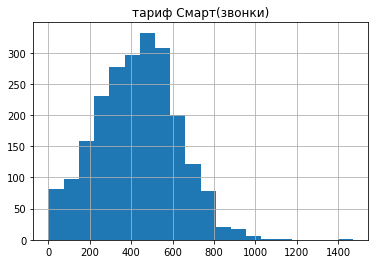

In [63]:
data[data['tariff'] == 'smart']['duration'].hist(bins=20)
plt.title('тариф Смарт(звонки)')

Text(0.5, 1.0, 'тариф Ультра(звонки)')

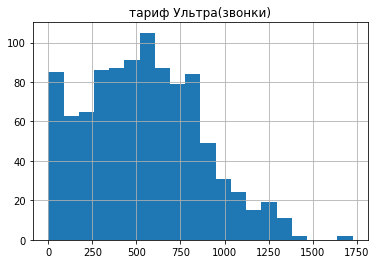

In [64]:
data[data['tariff'] == 'ultra']['duration'].hist(bins=20)
plt.title('тариф Ультра(звонки)')

Видим, что на Смарте большая часть выговаривает включенные минуты(500мин) и лишь малая часть выходит за грань.
При этом на Ультре люди выговаривают чуть большее время, чем на смарте(600-650 минут). При включенных 3000 минутах. То есть на ультре нет переплаты за звонки.

Рассмотрим также смс

In [65]:
data.groupby('tariff')\
  .agg({'message_month':['median','mean','var','std']})

message_month                                   
              median       mean          var        std
tariff                                                 
smart           28.0  33.384029   796.812958  28.227876
ultra           38.0  49.363452  2285.266143  47.804457

Text(0.5, 1.0, 'тариф Смарт(смс)')

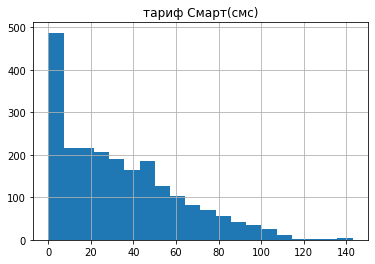

In [66]:
data[data['tariff'] == 'smart']['message_month'].hist(bins=20)
plt.title('тариф Смарт(смс)')

Text(0.5, 1.0, 'тариф Ультра(смс)')

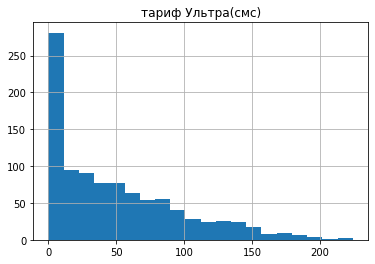

In [67]:
data[data['tariff'] == 'ultra']['message_month'].hist(bins=20)
plt.title('тариф Ультра(смс)')

И там, и там большая часть смс не отправляет - при существующих месседжерах это вполне объяснимо. В тарифе Ультра также никто не выходит за лимит. В смарте есть часть людей, кто все же еще пользуется смс и выходит за лимит.

In [68]:
data.groupby('tariff')\
  .agg({'mb_used':['median','mean','var','std']})

mb_used                                          
         median          mean           var           std
tariff                                                   
smart   16540.0  16237.184388  3.457199e+07   5879.795158
ultra   19324.0  19488.703553  1.019516e+08  10097.107541

Text(0.5, 1.0, 'тариф Смарт(интернет)')

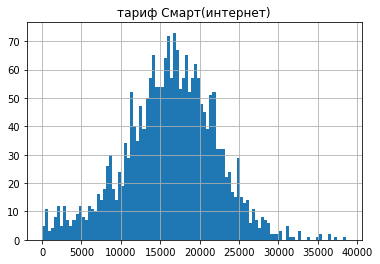

In [69]:
data[data['tariff'] == 'smart']['mb_used'].hist(bins=100)
plt.title('тариф Смарт(интернет)')

Text(0.5, 1.0, 'тариф Ультра(Интернет)')

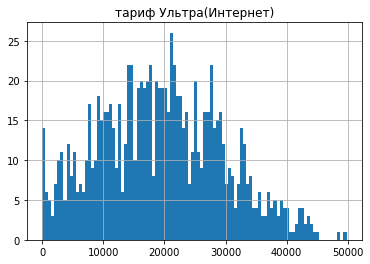

In [70]:
data[data['tariff'] == 'ultra']['mb_used'].hist(bins=100)
plt.title('тариф Ультра(Интернет)')

Опять же, пользователи Сматра часто выходят за пределы включенного трафика. Средний расход на уровне от 15 до 22 ГБ, при бесплатных 15. В Ультре включено 30Гб, как мы видим, единичные пользователи пользуются сверхтарифом.
Стоит посмотреть общую гистограмму расходов. Должна быть картина такова, что расходы на Ультра в пределах тарифа, Смарт -нет

In [71]:
data.groupby('tariff')['total_paid'].mean()

tariff
smart    1109.323015
ultra    2060.521827
Name: total_paid, dtype: float64

Text(0.5, 1.0, 'тариф Смарт(Общие расходы)')

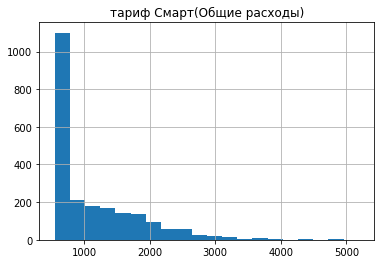

In [97]:
data[data['tariff'] == 'smart']['total_paid'].hist(bins=20)
plt.title('тариф Смарт(Общие расходы)')

Text(0.5, 1.0, 'тариф Ультра(Общие расходы)')

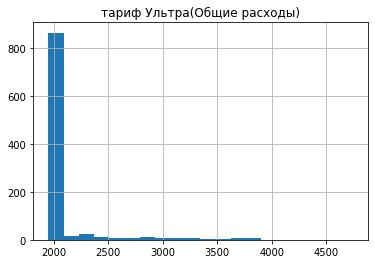

In [98]:
data[data['tariff'] == 'ultra']['total_paid'].hist(bins=20)
plt.title('тариф Ультра(Общие расходы)')

Так и есть. И там , и там большая часть все таки использует возможности в пределах тарифа, только абоненты на тарифе ультра имеют траты около тарифа, 2000, то на смарте тарифа явно "не хватает" - средняя оплата около 1000р, а это в 2 раза больше стоимости тарифа!

In [ ]:
import plotly.express as px

def analysis(df, usluga):
    
    """
    напишем общую функцию, которую можно будет применить ко всем услугам
    """
    
    # статистики
    pivot = df.pivot_table(index = 'tariff', values = usluga, aggfunc = ['mean', 'var', 'std'])
    print('Статистики по ', usluga)
    display(pivot)
    
    # гистграмма
    fig = px.histogram(df, x = usluga, color = 'tariff', marginal = 'box', title = 'Распределение '+usluga)
    fig.show()
    
    # средний расход в месяцц
    fig = px.line(df.pivot_table(index = ['tariff', 'month'], values = usluga, aggfunc = 'mean').reset_index(), x = 'month', y = usluga, color = 'tariff', title = 'Средний расход в месяц '+usluga)
    fig.show()
    

In [101]:

analysis(data, 'message_month')

Статистики по  message_month


,mean,var,std
,message_month,message_month,message_month
tariff,,,
smart,33.384029,796.812958,28.227876
ultra,49.363452,2285.266143,47.804457


In [102]:
#магия
analysis(data, 'mb_used')

Статистики по  mb_used


,mean,var,std
,mb_used,mb_used,mb_used
tariff,,,
smart,16237.184388,3.457199e+07,5879.795158
ultra,19488.703553,1.019516e+08,10097.107541


In [103]:
analysis(data, 'total_paid')

Статистики по  total_paid


,mean,var,std
,total_paid,total_paid,total_paid
tariff,,,
smart,1109.323015,501942.272634,708.478844
ultra,2060.521827,126941.292460,356.288215


Интересный факт при анализе всех средних показателей по месяцам - в январе и феврале явное "проседание" пользования связью и самые высокие показатели в декабре. Если декабрь можно объяснить - новогодние поздравления съедают время и услуги связи. То январь и февраль ... думаю, так. В декабре люди всегда пытаются завершить все деловые вопросы, поэтому в начале года больше свободы от рабочих звонков. Плюс учитываем, что в январе многие уезжают в отпуск , а февраль сам по себе месяц короткий. Вместе с тем, выручки от тарифа Ультра стабильны, когда Смарт летает вверх-вниз.
Что касается использования сообщений по тарифу Ультра тоже интересный момент. В декабре, июле и октябре выбивающиеся высокие показатели смс. Также можем сязать с отпуском - люди не тратят минуты и перезодят на смс.

# ШАГ 4

## Проверка гипотез

- средняя выручка пользователей тарифов «Ультра» и «Смарт» различается;
- средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов;

In [75]:
from scipy import stats as st
import numpy as np

Используем Гипотезу о равенстве средних двух генеральных совокупностей, так как показатели не зависимы между собой. Сформулируем гипотезы:
- H0: выручка пользователей тарифов «Ультра» и «Смарт» не различается
- H1: выручка пользователей тарифов «Ультра» и «Смарт» различается

In [76]:
smart = data[data['tariff'] == 'smart']
smart = smart['total_paid']

In [77]:
ultra = data[data['tariff'] == 'ultra']
ultra = ultra['total_paid']

In [78]:
alpha = .05

In [79]:
results = st.ttest_ind(
    smart, 
    ultra)

In [80]:
print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

p-значение: 8.142771087642089e-284
Отвергаем нулевую гипотезу


Полученное значение говорит о явно неслучайном отличии результатов, различие значимое. Следовательно, выручки у тарифов различаются в ген. совокупности

Проверим теперь гипотезу о Москве и других городах. Создадим новый столб с распределением Москва и Другие


In [81]:
def new_city(city):
    if 'Москва' in city:
        return 'МСК'
    return 'другое'
data['new_city'] = data['city'].apply(new_city)

Гипотезы:
- H0: средняя выручка пользователей из Москвы не отличается от выручки пользователей из других регионов
- H1: средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов

In [82]:
city = data[data['new_city'] == 'МСК']
city = city['total_paid']

In [83]:
other= data[data['new_city'] == 'другое']
other= other['total_paid']

In [84]:
alpha = .05

In [85]:
results = st.ttest_ind(
    city, 
    other)

In [86]:
print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

p-значение: 0.2458595611077658
Не получилось отвергнуть нулевую гипотезу


Практически с вероятностью 25% такой результат мог получиться случайно, значимых различий нет

# Общий вывод

Мы проанализировали поведение абонентов каждого тарифа.
**Смарт:**
- не хватает минут
- не хватает интернета
- двойная переплата
С точки зрения абонента, не самый интересный тариф.

**Ультра:**
- по звонкам и интернету все отлично

**Общие характеристики:**
- в обоих тарифах практически не пользуются смс сообщениями. Было бы интереснее прибавить за их счет трафик, допустим. 
- можно добавить "средний" тариф - для тех, кому мало опций на смарте и при этом Ультра кажется дорогим. Это привлечен дополнительных клиентов и , соответственно, повысит выручки.

При этом, нет разницы, Москва это или другие города - все абоненты одинаково предсказуемы в своем поведении.

Исходя из проведенного анализа, делаю вывод, что тариф "Ультра" более интересен - пользователь получает то, за что изначально подписался платить, и именно ту сумму, которую заранее был готов отдать на связь.

Тариф "Смарт" может разочаровывать пользователей из-за того, что абонент заведомо рассчитывал на одни траты, а в итоге пришлось доплачивать - люди не любят доплачивать или переплачивать. 
